In [2]:
#import library and data

import numpy as np
import pandas as pd
from pandas_datareader import data as wb
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import matplotlib.animation as animation

data = pd.read_excel('/Users/ad/Downloads/TNG.xlsx', index_col = 'Date')
index = pd.read_excel('/Users/ad/Downloads/VNINDEX.xlsx', index_col = 'Date')
bond = pd.read_excel('/Users/ad/Downloads/Vietnam 10-Year Bond Yield Historical Data.xlsx', index_col = 'Date')

In [3]:
# transform index column to the same data type

bond.index = pd.to_datetime(bond.index, format = '%b %d, %Y')
bond.index = bond.index.strftime('%Y-%m-%d')

data.index = pd.to_datetime(data.index, format = '%Y-%m-%d')
data.index = data.index.strftime('%Y-%m-%d')

index.index = pd.to_datetime(index.index, format = '%Y-%m-%d')
index.index = index.index.strftime('%Y-%m-%d')

In [4]:
# Sort bond yield data chronologically
bond_sorted = bond.sort_index()

In [5]:
index

,Close,Open,High,Low,Vol,% Change
Date,,,,,,
2018-01-02,995.77,986.05,996.18,984.34,186.02K,0.0117
2018-01-03,1005.67,999.86,1010.21,998.41,237.30K,0.0099
2018-01-04,1019.75,1009.37,1019.75,1009.00,252.91K,0.0140
2018-01-05,1012.65,1020.34,1020.60,1010.65,284.03K,-0.0070
2018-01-08,1022.90,1011.36,1022.90,1004.89,268.79K,0.0101
...,...,...,...,...,...,...
2022-09-26,1174.35,1203.28,1203.28,1159.12,757.09K,-0.0240
2022-09-27,1166.54,1174.35,1180.75,1166.44,466.62K,-0.0067
2022-09-28,1143.62,1166.54,1166.54,1142.79,527.70K,-0.0196


In [239]:
# Drop 1-1-2018 because the other two datasets do not contain information on this day. And for compatibility.

bond_adj = bond_sorted.drop(bond_sorted.index[0])

print(bond_adj)

            Price
Date             
2018-01-02  5.049
2018-01-03  5.047
2018-01-04  5.085
2018-01-05  5.106
2018-01-08  5.105
...           ...
2022-09-26  4.667
2022-09-27  4.874
2022-09-28  5.025
2022-09-29  4.975
2022-09-30  5.016

[1240 rows x 1 columns]


In [7]:
# Joining VNINDEX data and Bond data, this dataframe is called Premium.

index_final = index.drop(columns= ['Open','High','Low','Vol','% Change'])

Premium = pd.DataFrame(index_final).join(bond_adj, how ='left')

print(Premium)
print(Premium.dtypes)

              Close  Price
Date                      
2018-01-02   995.77  5.049
2018-01-03  1005.67  5.047
2018-01-04  1019.75  5.085
2018-01-05  1012.65  5.106
2018-01-08  1022.90  5.105
...             ...    ...
2022-09-26  1174.35  4.667
2022-09-27  1166.54  4.874
2022-09-28  1143.62  5.025
2022-09-29  1126.07  4.975
2022-09-30  1113.44  5.016

[1185 rows x 2 columns]
Close    float64
Price    float64
dtype: object


In [238]:
#Joining TNG data and bond data, this dataframe is called Returns_arfr.

data_final = data.drop(columns= ['Open','High','Low','Vol','% change'])

Returns_rfr = pd.DataFrame(data_final).join(bond_adj, how ='left',lsuffix = '_overlap')
Returns_arfr = Returns_rfr.dropna()
print(Returns_arfr)


            Closing_Price  Price
Date                            
2018-01-02         6923.5  5.049
2018-01-03         6725.6  5.047
2018-01-04         7022.4  5.085
2018-01-05         6972.9  5.106
2018-01-08         6972.9  5.105
...                   ...    ...
2022-09-26        21700.0  4.667
2022-09-27        21900.0  4.874
2022-09-28        21600.0  5.025
2022-09-29        20000.0  4.975
2022-09-30        19300.0  5.016

[1185 rows x 2 columns]


In [237]:
#Calculating daily returns for TNG, VNINDEX, Treasury note

data_returns = np.log(Returns_arfr['Closing_Price']/Returns_arfr['Closing_Price'].shift(1))
index_returns = np.log(Premium['Close']/Premium['Close'].shift(1))
bond_returns = np.log(Premium['Price']/Premium['Price'].shift(1))

data_returns



Date
2018-01-02         NaN
2018-01-03   -0.029000
2018-01-04    0.043184
2018-01-05   -0.007074
2018-01-08    0.000000
                ...   
2022-09-26   -0.066840
2022-09-27    0.009174
2022-09-28   -0.013793
2022-09-29   -0.076961
2022-09-30   -0.035627
Name: Closing_Price, Length: 1185, dtype: float64

In [236]:
#Drop na

TNG = data_returns.dropna(how = any)
VNINDEX = index_returns.dropna(how = any)

Rfr = bond_returns.dropna(how = any)
TNG

Date
2018-01-03   -0.029000
2018-01-04    0.043184
2018-01-05   -0.007074
2018-01-08    0.000000
2018-01-09    0.048456
                ...   
2022-09-26   -0.066840
2022-09-27    0.009174
2022-09-28   -0.013793
2022-09-29   -0.076961
2022-09-30   -0.035627
Name: Closing_Price, Length: 1184, dtype: float64

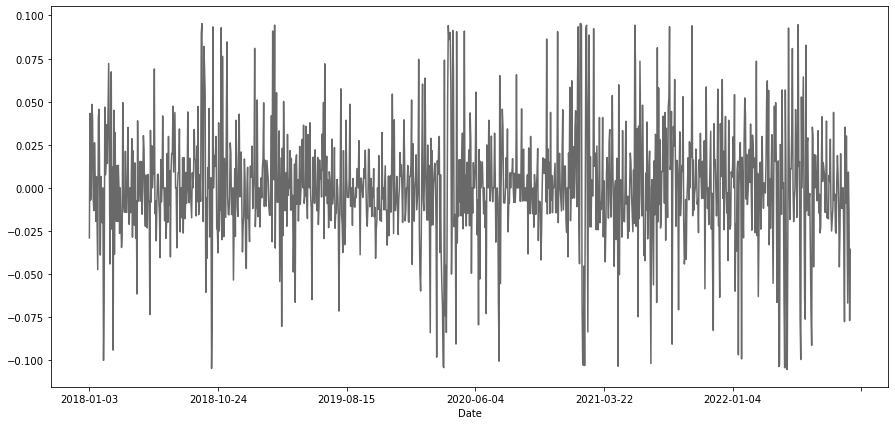

In [217]:
TNG.plot(figsize=(15,7), color = 'dimgray')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

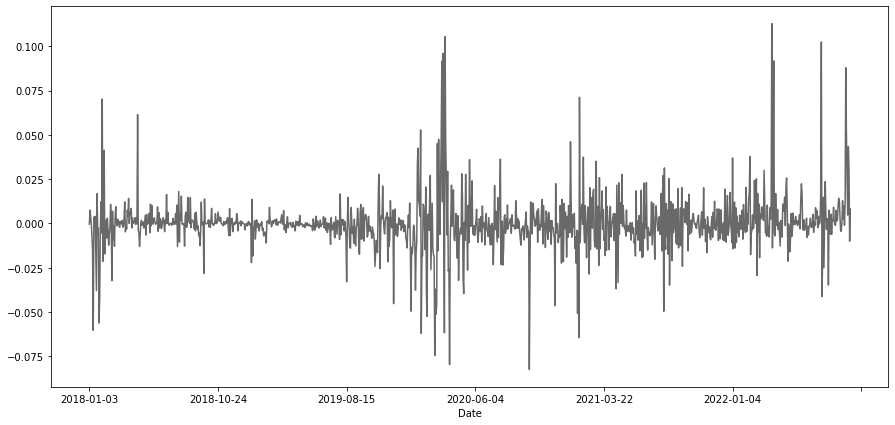

In [218]:
Rfr.plot(figsize=(15,7), x = 'Date',color = 'dimgray')
plt.show

In [13]:
# CAPM => r = RFR + Beta*Risk premium
# Beta = 1.24
# Risk Premium (Aswath Damodaran) = 7.8%
Rrfr = ((Premium['Price'].mean() + 1) / (0.018 + 1)) - 1
R = Rrfr + (1.24 * 0.078)


In [14]:
# 10-year T-bond coupon rate (4Y average)

Premium['Price'].mean()

3.4812548523206774

In [15]:
# Cost of Equity

TNG_returns = print (str(round(R, 4)) + '%')

3.4987%


In [16]:
# Risk free rate

Riskfree = print (str(round(Rrfr, 4)) + '%')

3.402%


In [17]:
# Assign value for regression
# Y = b1*X1 + error
X = TNG - Rfr
Y = VNINDEX - Rfr

<function matplotlib.pyplot.show(close=None, block=None)>

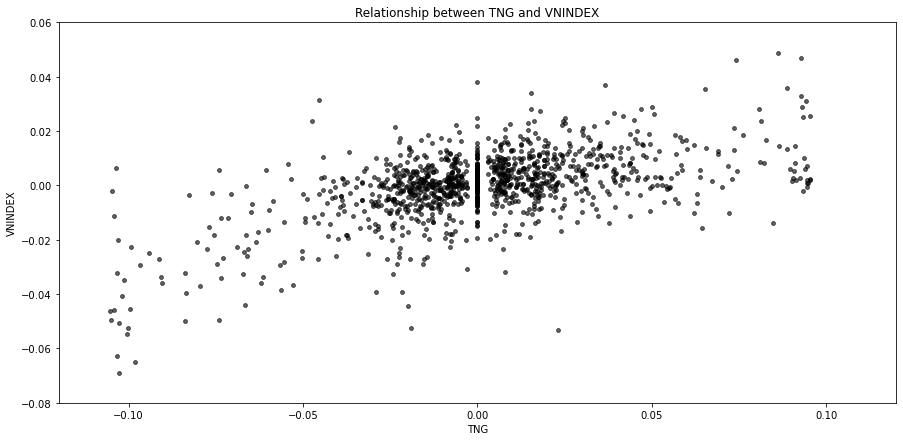

In [235]:
#Scatter Plot, TNG & VNINDEX
plt.figure(figsize = (15,7))
plt.scatter(TNG,VNINDEX,s = 15, c = 'k', alpha = 0.6)
plt.axis([-0.12, 0.12, -0.08, 0.06])
plt.ylabel('VNINDEX')
plt.xlabel('TNG')
plt.title('Relationship between TNG and VNINDEX')
plt.show

In [ ]:
#Assign independent and dependent variables for regression
# y = B0 + B1*x1

X1 = sm.add_constant(Y)
reg = sm.OLS(X,X1).fit()


In [ ]:
print (reg.summary())

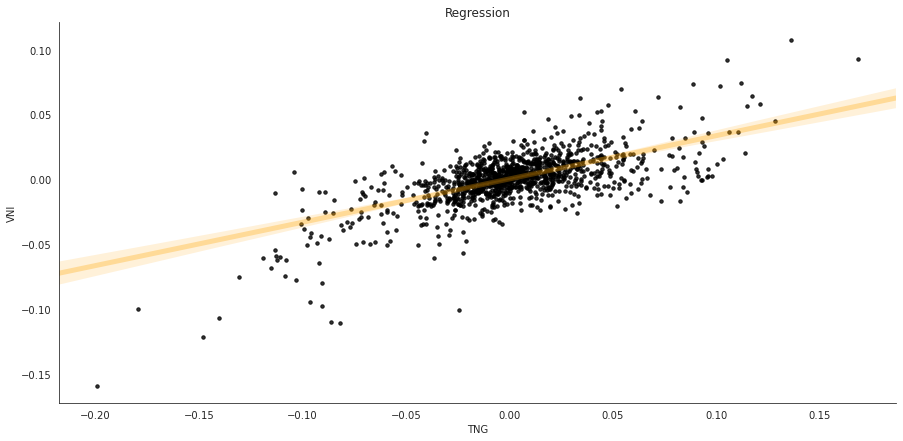

In [226]:
#Regression
plt.figure(figsize = (15,7))
sns.set_context(font_scale = -1)
with sns.axes_style("white"):
    
    Plot = sns.regplot(x = X, y = Y, robust = True, color = 'k', 
                       truncate = False, 
                       line_kws ={'lw':5,'alpha':0.3,'color':'orange'},
                       scatter_kws={'s':12,'alpha':0.8})
sns.despine() 
plt.xlabel('TNG')
plt.ylabel('VNI')
plt.title('Regression')
plt.show()

# plt.savefig('/Users/ad/Downloads/Valuation.jpg',bbox_inches='tight', dpi=300)

In [20]:
# Monte Carlo simulation, billion vnd
rev_m =  2161
rev_stdev =  1080
iterations = 2000

In [316]:
#Generate revenue iterations with mean of 2161 billions and standard deviation of 1080 billion vnd
rev = np.random.normal(rev_m, rev_stdev, iterations)
rev_adj = [n for n in rev if n > 0]


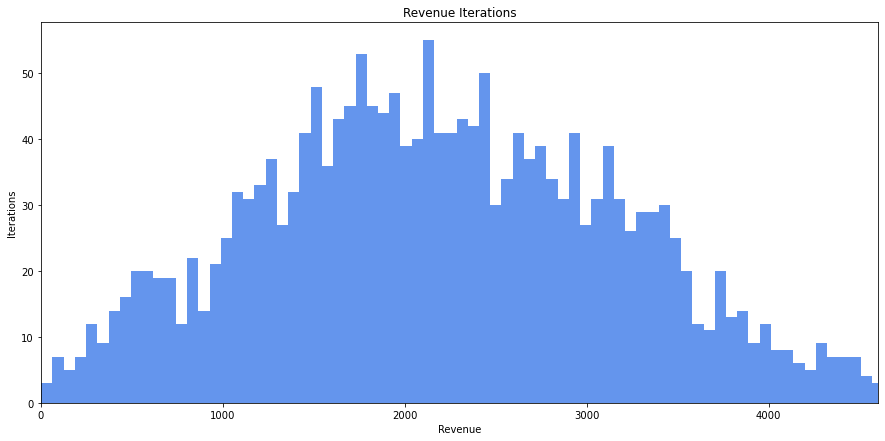

In [312]:
#Revenue iterations

plt.figure(figsize = (15,7))
plt.hist(rev_adj,100, color ='cornflowerblue')
plt.xlabel('Revenue')
plt.ylabel('Iterations')
plt.title('Revenue Iterations')
plt.xlim(0,4600)
plt.show()

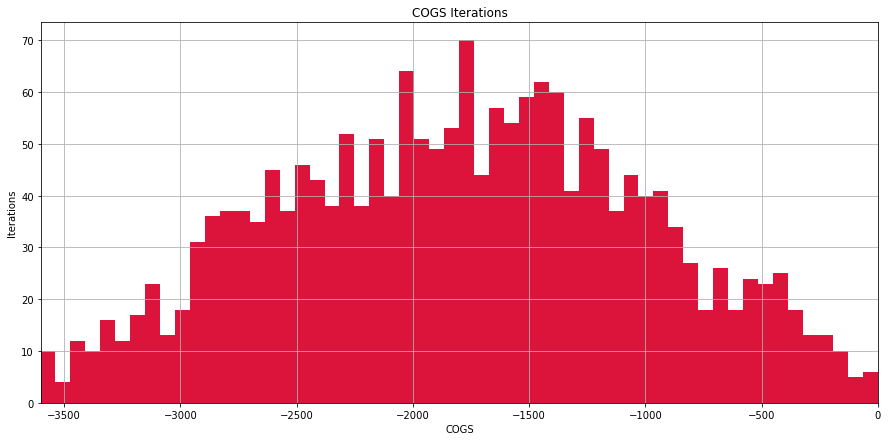

In [314]:
#COGS iterations

COGS = - (rev * np.random.normal(0.832,0.166))
COGS_adj = [n for n in COGS if n < 0]
plt.figure(figsize = (15,7))
plt.hist(COGS_adj, bins = 80, color = 'crimson')
plt.xlabel('COGS')
plt.ylabel('Iterations')
plt.title('COGS Iterations')
plt.xlim(-3600, 0)
plt.grid(True)
plt.show()

In [26]:
Gross_profit = rev + COGS
Gross_profit

array([1532.55739284,  837.21486517, 1574.3629016 , ..., 1083.30562917,
       1357.30698497, 1293.61978212])

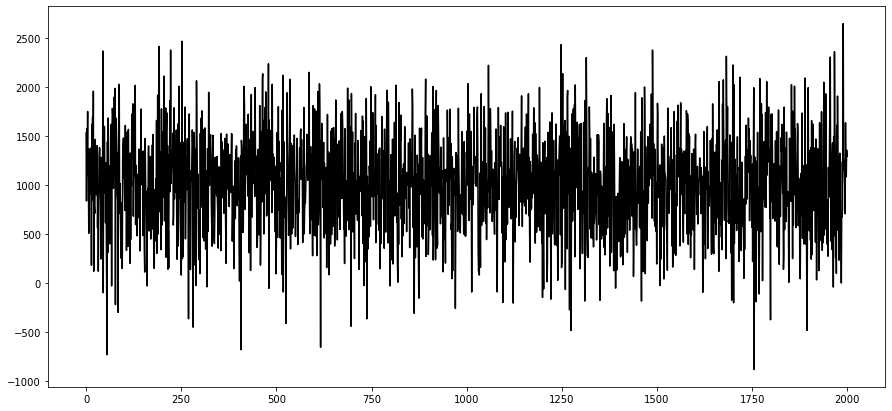

In [212]:
plt.figure(figsize = (15,7))
plt.plot(Gross_profit, color ='k')
plt.show()

In [28]:
max(Gross_profit)

2650.231810435299

In [29]:
min(Gross_profit)

-885.2009837917633

In [30]:
Gross_profit.std()

501.61102342291537

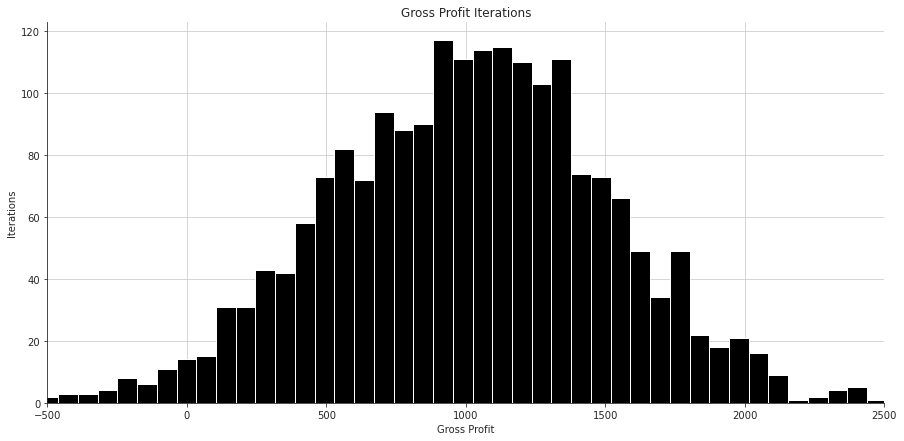

In [298]:
#Gross Profit iterations

plt.figure(figsize = (15,7))

with sns.axes_style("ticks"):
    GP = plt.hist( Gross_profit, bins = 50, color = 'black')
sns.despine()
plt.xlabel('Gross Profit')
plt.ylabel('Iterations')
plt.title('Gross Profit Iterations')
plt.xlim(-500, 2500)
plt.grid(True)
plt.show()
 